# Working on Wine Dataset

### Doing necessary imports

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### Reading Data from CSV file

In [3]:
df = pd.read_csv('/Users/ayushsaksena/Desktop/Interests/SOM/datasets/wine+quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Preprocessing

In [4]:
df.shape

(1599, 12)

### Checking to see any NaN values

In [5]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

### Seperating Dataset as X and Y values

In [6]:
X = df.drop(['quality'],axis='columns')
Y = df.quality

## Visualizing Dataset

For this We can use:
1) Seaborn
2) MatplotLib

We'll be using Matplotlib library to plot and see the database to decide which columns to drop.

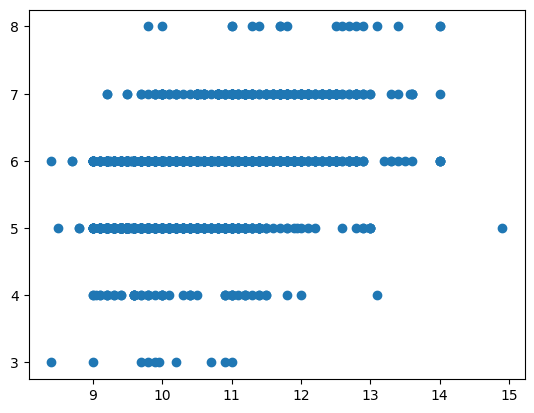

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['alcohol'],df.quality)

## Selecting the best model and Hyperparameter Tuning

As taught in Week 4, We'll be using GridSearchCV to find the best hyperparameter for the model. It is because the dataset is small so searching through all the parameters will be the best and not take a lot of time.

As this is Classification after looking at the graph, We'll be testing on the following 4 models:
1) Logistic Regression
2) Decision Tree Classifier
3) Random Forest Classifier
4) KNN Regression

### Using Logistic Regression

In [8]:
clf = GridSearchCV(LogisticRegression(multi_class='multinomial',max_iter=400),
            {'C': [1,5,10]}, cv=5)

clf.fit(X, Y)
clf.best_score_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.5841222570532916

In [9]:
clf.best_params_

{'C': 10}

In [10]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070210,0.018365,0.000842,0.000510,1,{'C': 1},0.521875,0.562500,0.609375,0.593750,0.583072,0.574114,0.030242,3
1,0.054758,0.000957,0.000496,0.000066,5,{'C': 5},0.525000,0.584375,0.603125,0.590625,0.592476,0.579120,0.027726,2
2,0.055033,0.000299,0.000445,0.000060,10,{'C': 10},0.528125,0.571875,0.625000,0.600000,0.595611,0.584122,0.032683,1


### Using Decision Tree Classifier

In [11]:
X_train = df[['alcohol']]
clf = GridSearchCV(tree.DecisionTreeClassifier(),{
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random']
}, cv=5)
clf.fit(X_train, Y)
clf.best_score_

0.5246845611285267

In [12]:
clf.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [13]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000837,0.000307,0.000405,0.000036,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.50625,0.503125,0.584375,0.534375,0.489028,0.523431,0.033838,4
1,0.000744,0.000246,0.000501,0.000254,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.50625,0.503125,0.584375,0.534375,0.492163,0.524058,0.033218,3
2,0.000814,0.000168,0.000425,0.000064,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.50625,0.503125,0.584375,0.534375,0.489028,0.523431,0.033838,4
3,0.000606,0.000052,0.000374,0.000033,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.50625,0.503125,0.584375,0.534375,0.495298,0.524685,0.032635,1
4,0.000630,0.000014,0.000363,0.000004,log_loss,best,"{'criterion': 'log_loss', 'splitter': 'best'}",0.50625,0.503125,0.584375,0.534375,0.489028,0.523431,0.033838,4
5,0.000626,0.000052,0.000396,0.000073,log_loss,random,"{'criterion': 'log_loss', 'splitter': 'random'}",0.50625,0.503125,0.584375,0.534375,0.495298,0.524685,0.032635,1


### Using Random Forest Classifier

In [14]:
clf = GridSearchCV(RandomForestClassifier(),{
     'criterion': ['gini', 'entropy', 'log_loss']
}, cv=5)
clf.fit(X, Y)
clf.best_score_

0.575362460815047

In [15]:
clf.best_params_

{'criterion': 'gini'}

In [16]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.152999,0.000869,0.004111,0.000216,gini,{'criterion': 'gini'},0.540625,0.556250,0.606250,0.593750,0.579937,0.575362,0.024021,1
1,0.186388,0.002003,0.004021,0.000158,entropy,{'criterion': 'entropy'},0.543750,0.543750,0.600000,0.578125,0.598746,0.572874,0.025017,2
2,0.185496,0.001742,0.003926,0.000119,log_loss,{'criterion': 'log_loss'},0.506250,0.553125,0.628125,0.571875,0.586207,0.569116,0.039974,3


### Using KNN Means

In [17]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y)
grid_search.best_score_

0.5015458463949842